# データの読み込み、データフレームへの変換

In [1]:
# モジュールをインポート
import sys
import os

# 親ディレクトリの'src'フォルダをPythonのパスに追加
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# pandasをインポート
import pandas as pd

# 自作の探索的データ分析モジュールから関数をインポート
from exploratory_data_analysis import data_overview, plot_heatmap, plot_boxplot

In [2]:
# 表示する行数や列数の最大値を無制限に設定
pd.set_option('display.max_columns', None)  # 全ての列を表示
pd.set_option('display.max_rows', None)     # 全ての行を表示

In [3]:
# ファイルのパス
file_path = '../data/titanic/train.csv'

# ファイルを読み込む
df = pd.read_csv(file_path)

# データの概観

In [4]:
data_overview(df, num_rows=3)

データフレームのサイズ: (891, 12)

各列のデータ型:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

最初の3行:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  



# データの可視化

## 質的変数対質的変数

### クロス集計表＋ヒートマップ

比較項目
- Survived
   - Pclass
   - Sex
   - Embarked

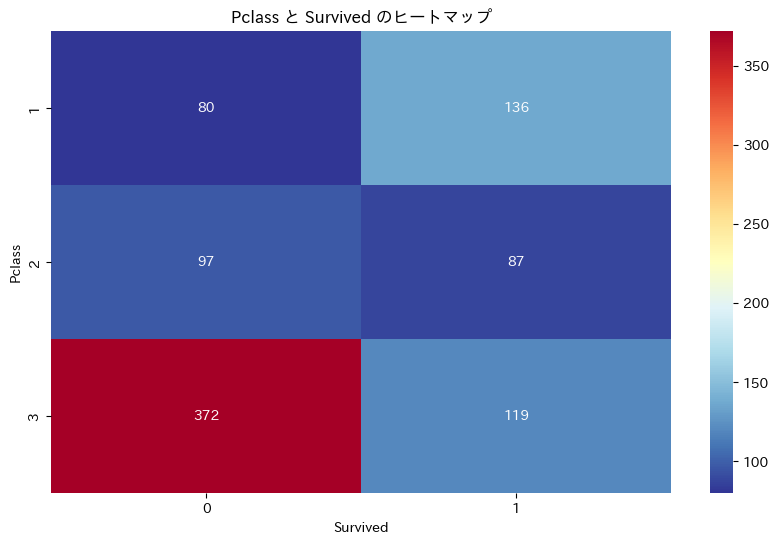

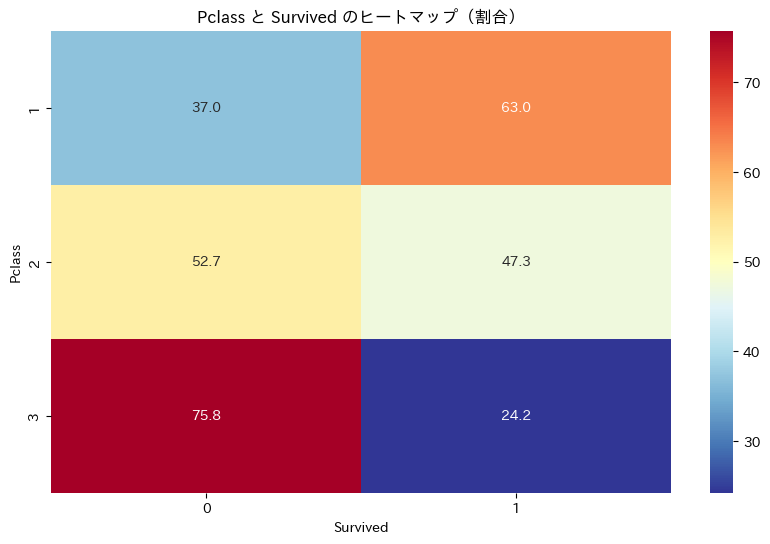

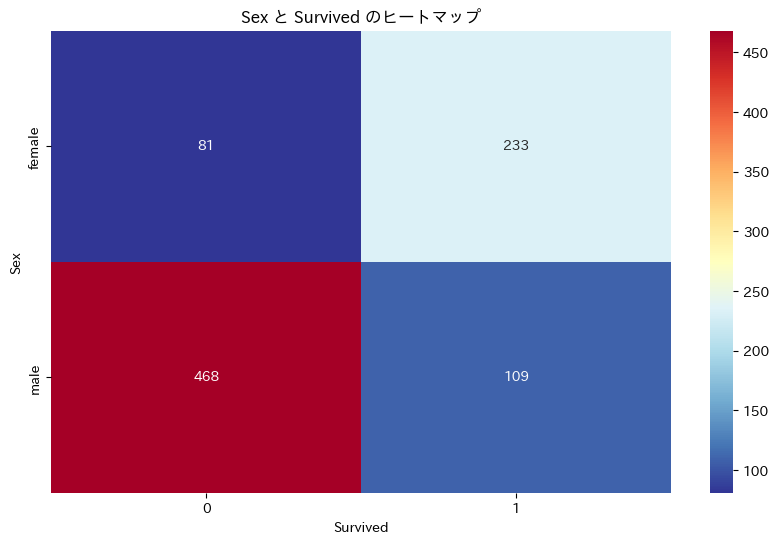

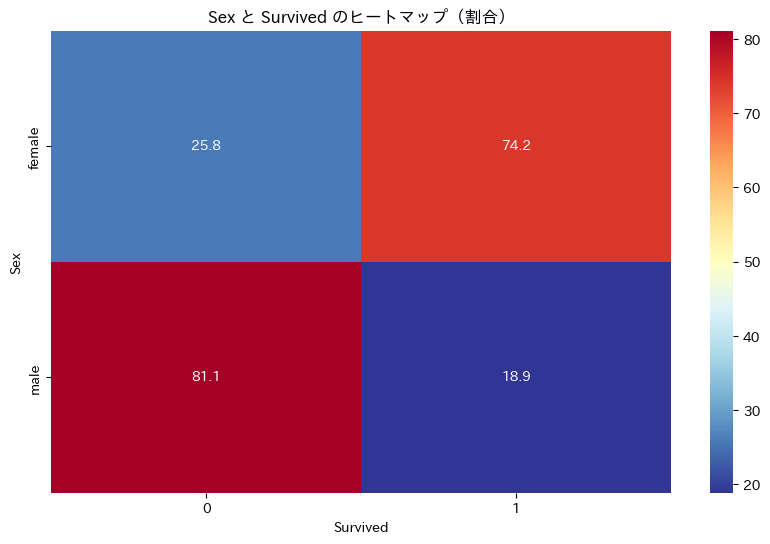

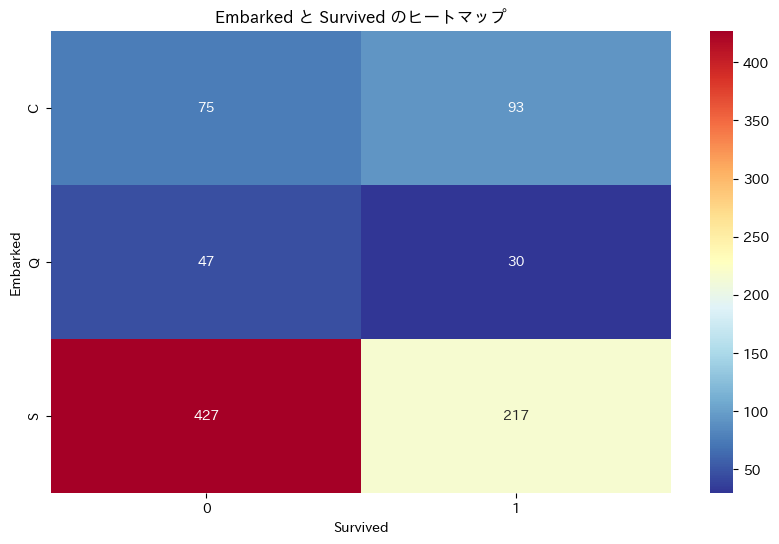

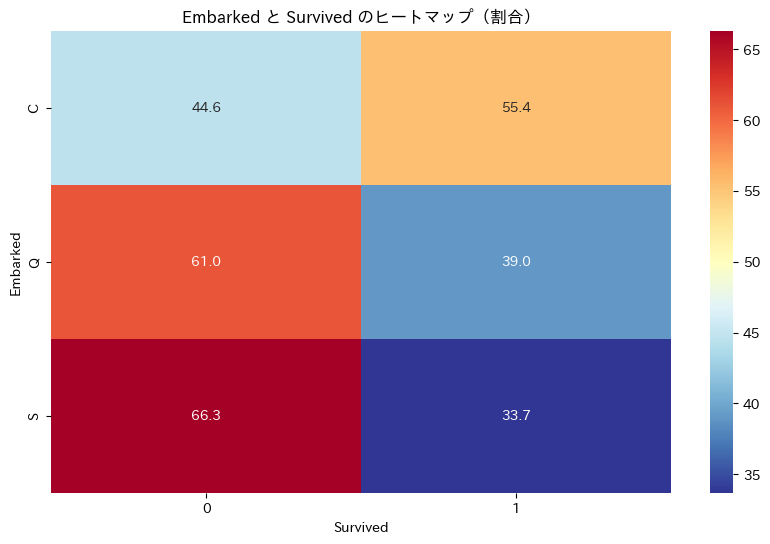

In [5]:
# カテゴリ変数のリストを定義
cat_vars = ['Pclass', 'Sex', 'Embarked']
# ヒートマップに表示するオプションを定義（パーセンテージを表示するかどうか）
show_options = [False, True]

# 各カテゴリ変数についてループ
for cat_var in cat_vars:
    # パーセンテージ表示オプションについてループ
    for show_percentage in show_options:
        # ヒートマップをプロットする関数を呼び出し
        # df（データフレーム）、現在のカテゴリ変数、目的変数（'Survived'）、および表示オプションを渡す
        plot_heatmap(df, cat_var, 'Survived', show_percentage=show_percentage)

示唆
- チケットクラスが高いほど生存率も高い（チケットクラスが低いほど生存率も低い）
- 女性の生存率が高い（男性の生存率が低い）
- 搭乗港 C の生存率が高い

## 質的変数対量的変数

### 箱ひげ図

比較項目
- Survived
   - Age
   - SibSp
   - Parch
   - Fare


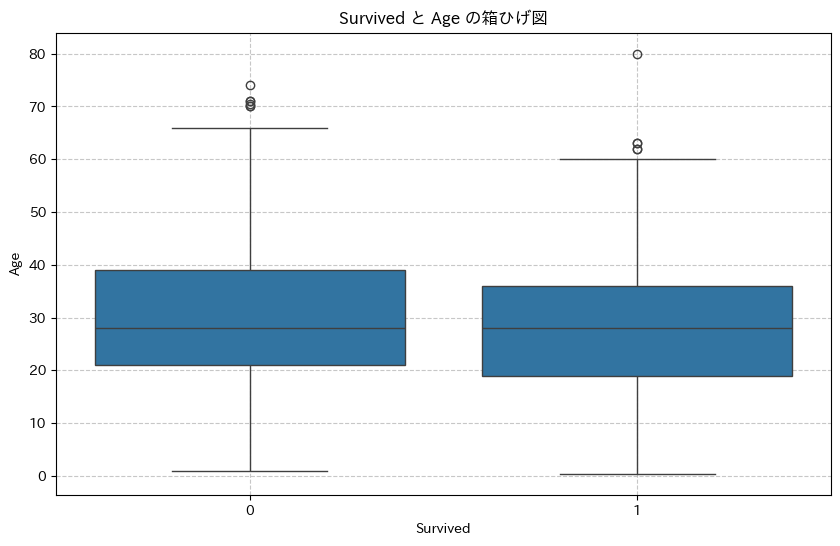

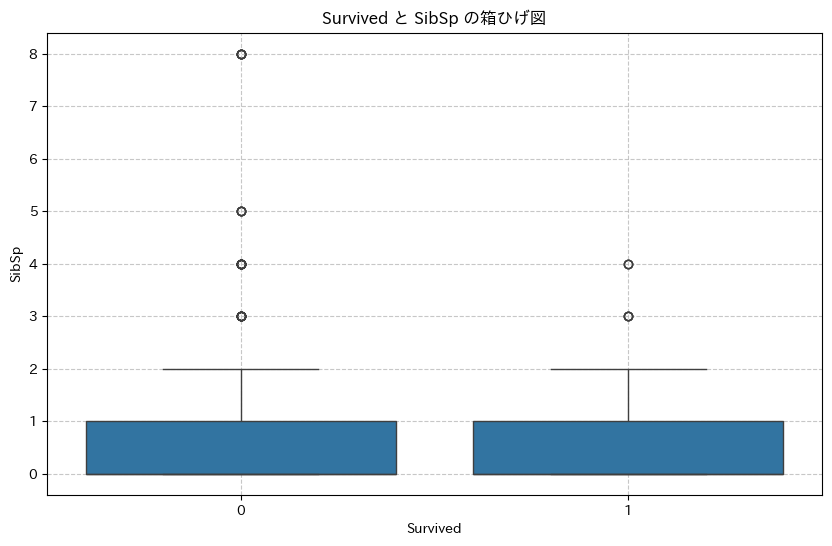

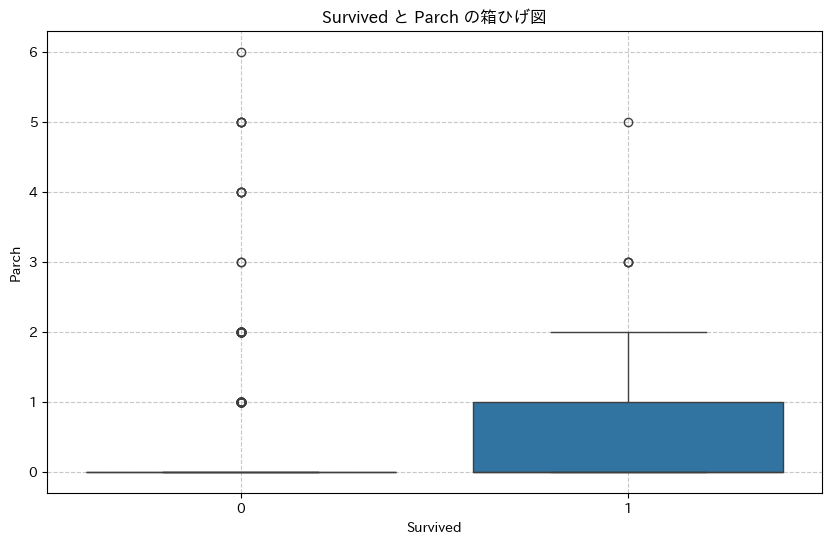

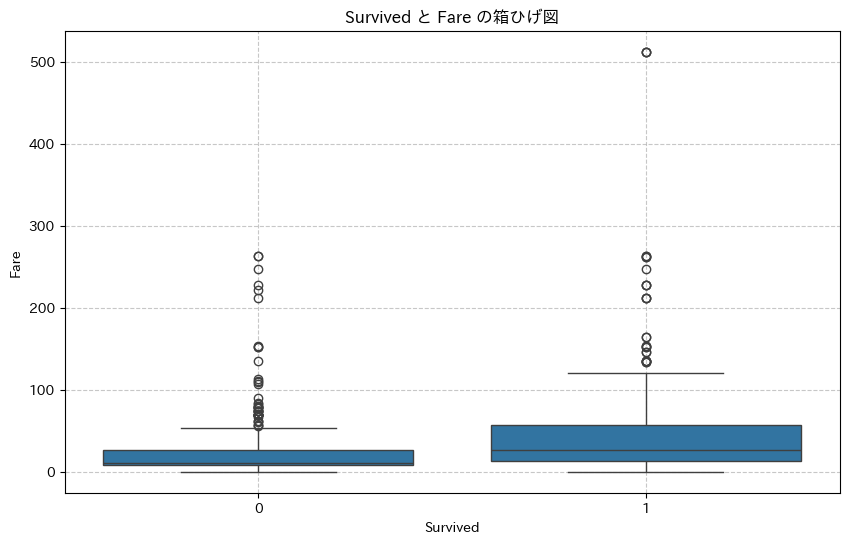

In [6]:
# 数値変数のリストを定義
num_vars = ['Age', 'SibSp', 'Parch', 'Fare']
# 表示オプションは不要なため、直接ループはしない

# 各数値変数についてループ
for num_var in num_vars:
    # ボックスプロットをプロットする関数を呼び出し
    # df（データフレーム）、目的変数（'Survived'）、および現在の数値変数を渡す
    plot_boxplot(df, 'Survived', num_var)


示唆
- 生存者の方がやや若い
- 非生存者には親子が居ないケースが多い
- 生存者の方が運賃が高い